In [2]:
import cv2 
import numpy as np
import matplotlib.pylab as plt
import math 
from function import SelectShapeStd
def showC(img):
    rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(rgb,cmap="gray")
    
def show(img):
    plt.imshow(img,cmap="gray")

In [3]:
import imageCore as imageCore
imageCore.__all__

['SelectShape',
 'find_formula_line',
 'OpeningRectangle',
 'ClosingRectangle',
 'FillUp',
 'SelectShapeStd',
 'ConvexHull',
 'ErodeRectangle',
 'line_intersection',
 'SelectContour',
 'drawContourMask']

In [ ]:
imageCore.SelectShape()

index:2
number contour: 1


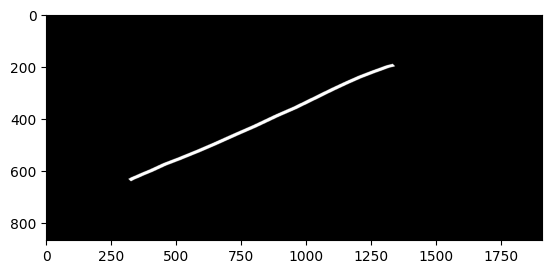

In [124]:
img  = cv2.imread("images/line.png")
gray = cv2.imread("images/line.png",0)

_, threshold  = cv2.threshold(gray,10, 255 , cv2.THRESH_BINARY_INV)

threshold1 = SelectShapeStd(threshold,mode ="width" )
contours , _  =cv2.findContours(threshold1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

print(f'number contour: {len(contours)}')

show(threshold1)

point_x1 = contours[0][0][0][0]
point_y1 = contours[0][0][0][1]

point_x2 = contours[0][100][0][0]
point_y2 = contours[0][100][0][1]


point_1 = (point_x1, point_y1)
point_2 = (point_x2, point_y2)

index:1
468.3498375184638 231.8714623338257


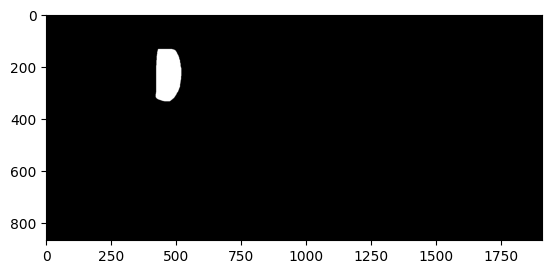

In [50]:

threshold2 = SelectShapeStd(threshold,mode ="area" )
contours2 , _  = cv2.findContours(threshold2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
show(threshold2)

moment = cv2.moments(contours2[0])
center_x = moment["m10"] / moment["m00"]
center_y = moment["m01"] / moment["m00"]
print(center_x, center_y)

In [24]:
contours[0][10][0]

array([1322,  194], dtype=int32)

# **Distances in 2-Dimention**

1. Distance between Point and Point (Vertical, Horizontal, Euclidean)
2. Minimum Distance between Point and Line
3. Minimum Distance between Line and Region 
4. Minimum Distance between Region and Region
5. Intersection between Line and Line
6. Intersection between Line and Region (Line and Contours)

# **Distance between Point and Point (Vertical, Horizontal, Euclidean)**

In [34]:
def distance_point_to_point(p1,p2, mode= "vertical"):
    
    x1,y1 = p1
    x2,y2 = p2
    
    if mode == "vertical":
        return abs (y1-y2)
    
    if mode == "horizontal":
        return abs (x1-x2)
    
    if mode == "eucliden":
        return math.sqrt((x1-x2)**2 + (y2-y1)**2)
    
     
dis = distance_point_to_point(point_1, point_2, mode="eucliden")
print(dis)
 

105.94810050208545


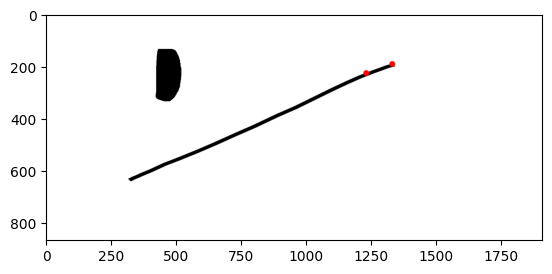

In [32]:
img_copy = img.copy()

cv2.circle(img_copy,point_1, 1, (0, 0,255), 20 )
cv2.circle(img_copy,point_2, 1, (0, 0,255), 20 )
showC(img_copy)

# **Minimum Distance between Point and Line**

1


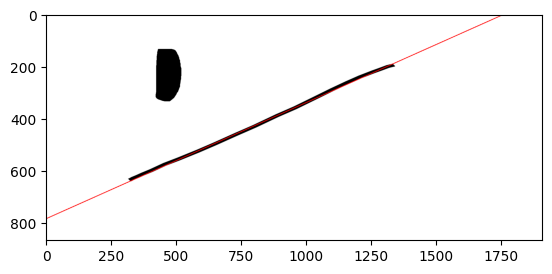

In [35]:
img_copy = img.copy()

lines = cv2.HoughLines(threshold, 1, np.pi / 180, 1103,  None, 0, 0)
print(len(lines))

for i in range(0, len(lines)):
    rho = lines[i][0][0]
    alpha = lines[i][0][1]
    a = math.cos(alpha)
    b = math.sin(alpha)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 2000*(-b)), int(y0 + 2000*(a)))
    pt2 = (int(x0 - 2000*(-b)), int(y0 - 2000*(a)))
    cv2.line(img_copy, pt1, pt2, (0,0,255),2)
    
showC(img_copy)

In [38]:
 def find_formula_line(point1, point2):
    # song song voi truc Ox thi y = nhau
    x1,y1 = point1
    x2,y2= point2

    if y1 == y2:
        A = 0
        B = 1
        C = - y1

    # song song voi truc Oy thi x = nhau
    elif x1 == x2:
        A = 1
        B = 0
        C = - x1
     
    # cat ox, oy   
    else:
        A = (y1 - y2)/(x1-x2)
        B = -1
        C = y2 - A * x2

    return A, B, C

line = find_formula_line(pt1, pt2)
print(line)

(-0.445113605255954, -1, 784.7506159321106)


In [52]:
def line_intersection(line1, line2):
    
    A1, B1, C1 = line1
    A2, B2, C2 = line2
    
    det_x = B1*C2  - B2*C1
    det_y = A2*C1 - A1*C2 
    
    det = A1*B2 - A2*B1 
    
    if det == 0 :
        # Khong co giao diem giua 2 duong thang
        return ()
    
    x = det_x / det
    y = det_y / det
    
    return (x, y )

def find_perpendicular_line(p1, line):
    
    x1, y1 = p1
    
    A, B, C = line
    
    return (-B,A, B*x1 -A*y1 )
    
    

def distance_point_to_line(p1, line):
    A, B, C  = line
    x1, y1 = p1
    
    # Tim duong thang di qua point p1 va vuong goc voi line 
    line_perpendicular = find_perpendicular_line(p1, line)
    
    
    # Tim giao diem giua 2 duong thang 
    point_intersec = line_intersection(line, line_perpendicular)
    
    dis_min = abs(A*x1 + B*y1 +C) /  math.sqrt(A**2 + B**2)
    return point_intersec , dis_min



point_intersec , dis_min = distance_point_to_line ((int(center_x), int(center_y)), line )
print(point_intersec, dis_min)

(596.3328235642535, 519.314762902963) 315.5863053298821


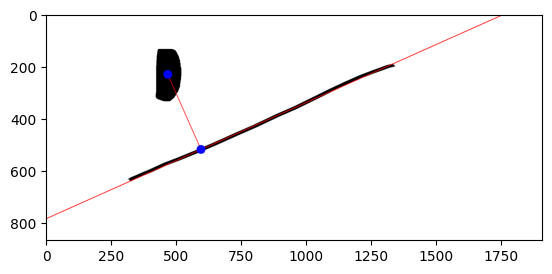

In [59]:

cv2.line(img_copy, (int(point_intersec[0]), int(point_intersec[1])), (int(center_x), int(center_y)), (0,0,255),2)
cv2.circle(img_copy,(int(center_x), int(center_y)), 2, (255, 0,0), 30 )
cv2.circle(img_copy,(int(point_intersec[0]), int(point_intersec[1])), 2, (255, 0,0), 30 )
showC(img_copy)
    

# **Minimum Distance between Line and Region**

In [64]:
minumum = 99999999999
point_intersec_minimum = ()
point_on_contour = ()

for point in contours2[0]:
    x1 = point[0][0]
    y1 = point[0][1]
        
    point_intersec , dis_min = distance_point_to_line ((int(x1), int(y1)), line)
    
    if dis_min < minumum:
        minumum = dis_min
        point_intersec_minimum = point_intersec
        point_on_contour = (x1,y1)

           

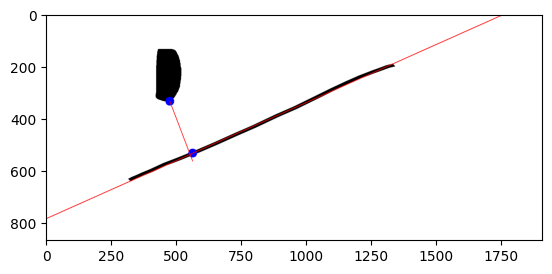

In [67]:
img_copy = img.copy()
cv2.circle(img_copy,(int(point_on_contour[0]), int(point_on_contour[1])), 2, (255, 0,0), 30 )

cv2.circle(img_copy,(int(point_intersec_minimum[0]), int(point_intersec_minimum[1])), 2, (255, 0,0), 30 )

cv2.line(img_copy, (int(point_on_contour[0]), int(point_on_contour[1])), (int(point_intersec_minimum[0]), int(point_intersec_minimum[0])), (0,0,255),2)

cv2.line(img_copy, pt1, pt2, (0,0,255),2)

showC(img_copy)

# **Minimum Distance between Region and Region**

In [69]:
point_on_contour1 = ()
point_on_contour2 = ()
minimum = 999999999

for point in contours2[0]: # contour2 tap hop diem cua region phia tren 
    x1 = point[0][0]
    y1 = point[0][1]
    
    for point in contours[0]: # contour2 tap hop diem cua region phia tren 
        x2 = point[0][0]
        y2 = point[0][1]
        
        
        dis = math.sqrt ((x1-x2)**2 + (y1-y2)**2)
        
        if dis < minimum:
            minimum = dis  
            point_on_contour1 = (x2, y2)
            point_on_contour2 = (x1, y1)

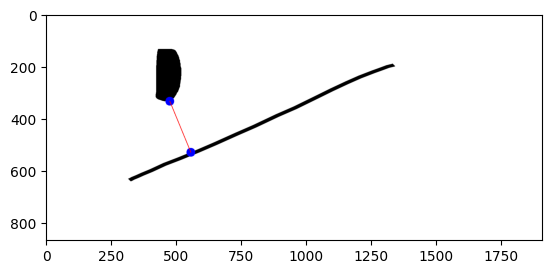

In [71]:
img_copy = img.copy()
cv2.circle(img_copy,(int(point_on_contour1[0]), int(point_on_contour1[1])), 2, (255, 0,0), 30 )
cv2.circle(img_copy,(int(point_on_contour2[0]), int(point_on_contour2[1])), 2, (255, 0,0), 30 )

cv2.line(img_copy, (int(point_on_contour1[0]), int(point_on_contour1[1])), (int(point_on_contour2[0]), int(point_on_contour2[1])), (0,0,255),2)
#cv2.line(img_copy, pt1, pt2, (0,0,255),2)

showC(img_copy)

# **Intersection between Line and Line**

In [72]:
def line_intersection(line1, line2):
    
    A1, B1, C1 = line1
    A2, B2, C2 = line2
    
    det_x = B1*C2  - B2*C1
    det_y = A2*C1 - A1*C2 
    
    det = A1*B2 - A2*B1 
    
    if det == 0 :
        # Khong co giao diem giua 2 duong thang
        return ()
    
    x = det_x / det
    y = det_y / det
    
    return (x, y )

# **Intersection between Line and Region (Line and Contours)**

In [98]:
contours2[0].tolist()[0]

[[432, 134]]

In [109]:

if [[432, 135]] in contours2[0].tolist():
    print("ok")

index:1


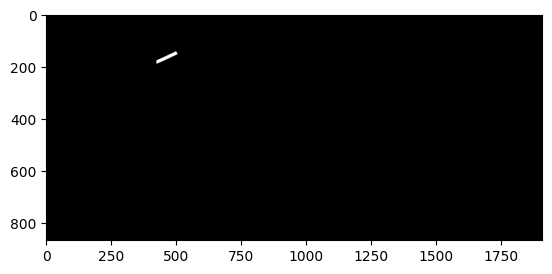

In [120]:
img1  = cv2.imread("images/line_intersec.png")
gray = cv2.imread("images/line_intersec.png",0)

_, threshold  = cv2.threshold(gray,10, 255 , cv2.THRESH_BINARY_INV)

threshold3 = SelectShapeStd(threshold,mode ="width" )
contours , _  =cv2.findContours(threshold3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
show(threshold1)

result = cv2.bitwise_and(threshold3, threshold2)
show(result)

In [114]:
point_intersec = []

def intersec_line_contour(line_contours, region_contours):
    for point in contours2[0].tolist(): # contour2 tap hop diem cua region phia tren 
   
        if point in contours[0].tolist():
            # 
            print("point")
            point_intersec.append(point[0])
    
intersec_line_contour (contours,contours2 )
print(point_intersec)
    

point
point
point
[[425, 177], [425, 190], [500, 143]]


[425, 177]
[425, 190]
[500, 143]


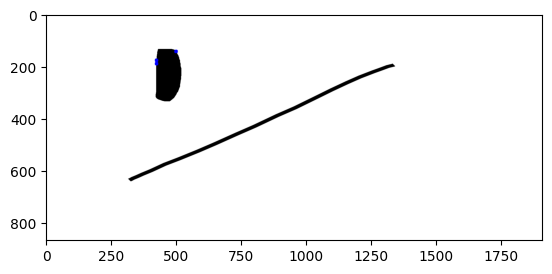

In [125]:
img_copy = img.copy()

for point in point_intersec:
    print(point)
    cv2.circle(img_copy,(int(point[0]), int(point[1])), 2, (255, 0,0), 10)
 
showC(img_copy)   